# IMPORTING INPORTANT LIBRAIES

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# IMPORTING DATASET

In [140]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [141]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


# FEATURES OF DATA SET

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
*  Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

# ROW AND COLUMNS 

In [142]:
print("NUMBER OF ROW : ",df.shape[0])
print("NUMBER OF COLUMNS : ",df.shape[1])

NUMBER OF ROW :  1517
NUMBER OF COLUMNS :  14


# IDENTIFIED THE DATA TYPE

In [143]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

MOST OF TH ECOLUMNS ARE IN FLOAT EXCEPT "unname","data","type","regio"

# DROP NOT IMPORTANT COLUMNS "unnamed"

In [144]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [145]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


# LETS SEEN WHOLE INFORAMTION OF DATASET

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


In [147]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

THEIR IS NO NULL VALUE IN DATASET 

In [148]:
df.duplicated().sum()

0

no duplicate in dataset

In [149]:
df.nunique()

Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

In [150]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


# HEATMAP OF NULL VALIUE

<AxesSubplot:>

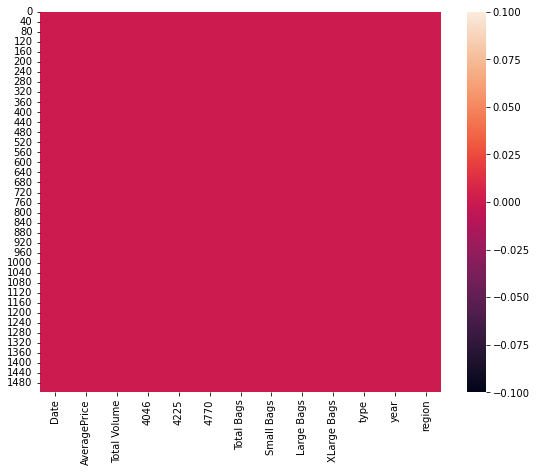

In [151]:
plt.figure(figsize=(9,7))
sns.heatmap(df.isnull())

their is no null value in dataset

# START DATA VISUALIZATION

# 1. TOP 5 COUNTRY WHERE HIGHEST NUMBER OF AVERAGE PRICE 

In [152]:
r=df.groupby(["region"]).sum()

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

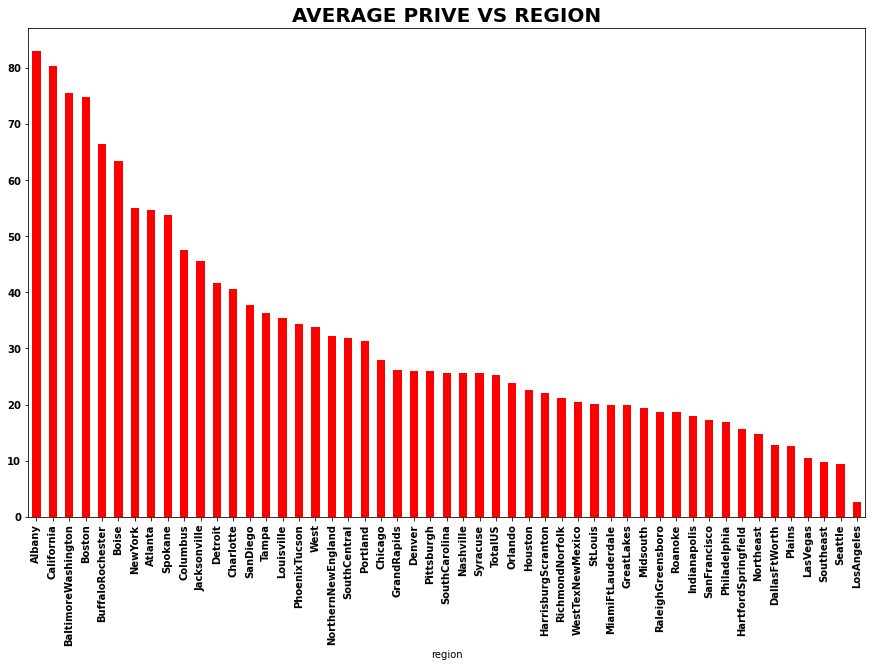

In [153]:
rn=r.sort_values(["AveragePrice"],ascending=False)
plt.figure(figsize=(15,9))
rn["AveragePrice"].plot(kind="bar",color="red")
plt.title("AVERAGE PRIVE VS REGION",fontsize=20,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

OBSERVATION:-here are top 5 country where AVERAGE PRIVE IS VERY HIGH
    
    *ALBANY
    *California
    *Baltimore Washington
    *Boston
    *BuffaloRochester

# 2.TOP COUNTRY WHERE HIGHEST NUMBER OF TOTAL VOLUME 

In [154]:
rt=rn.sort_values(["Total Volume"],ascending=False)

(array([0.e+00, 1.e+08, 2.e+08, 3.e+08, 4.e+08, 5.e+08, 6.e+08, 7.e+08,
        8.e+08, 9.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

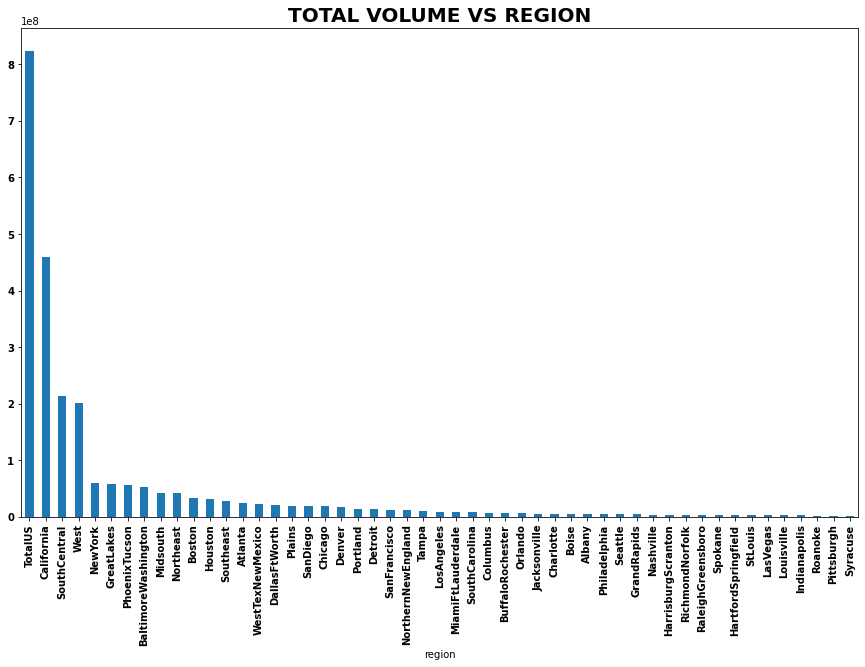

In [155]:
plt.figure(figsize=(15,9))
rt["Total Volume"].plot(kind="bar")
plt.title("TOTAL VOLUME VS REGION",fontsize=20,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

OBSERVATION:-HERE ARE SOME COUNTRY WHERE TOTAL VOLUME IS HIGHESST
    
    *TOTALUS
    *CALIFORNIA
    *WESYT
    *NEW YORK

# 3.) TOP COUNTRY WHERE HIGHEST BAG USED BAGS

In [156]:
rto=r.sort_values(["Total Bags"],ascending=False)

(array([0.0e+00, 2.0e+07, 4.0e+07, 6.0e+07, 8.0e+07, 1.0e+08, 1.2e+08,
        1.4e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

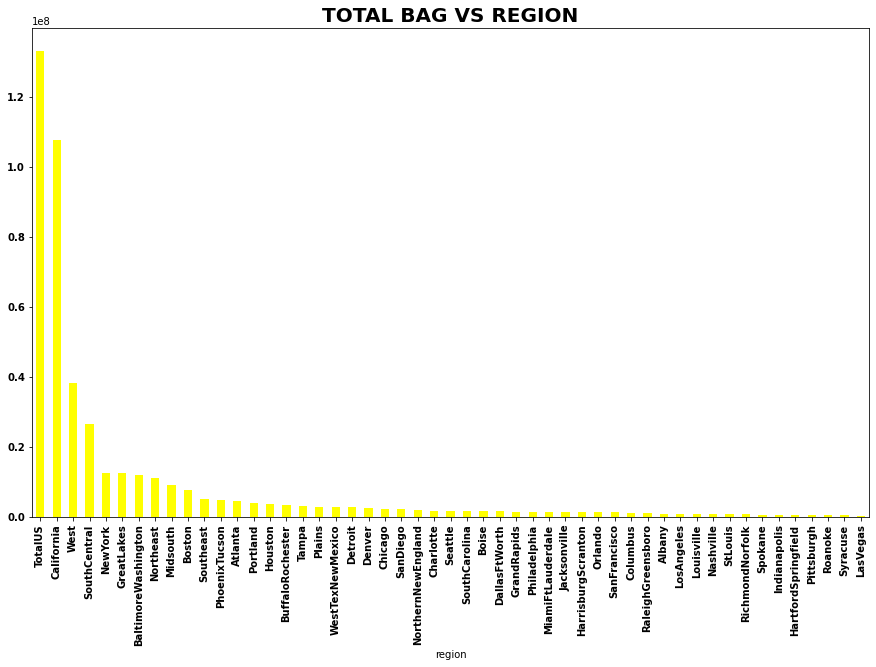

In [157]:
plt.figure(figsize=(15,9))
rto["Total Bags"].plot(kind="bar",color="yellow")
plt.title("TOTAL BAG VS REGION",fontsize=20,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

OBSERAVTION:-
    
    *TOTALUS
    *CALIFORNIA
    *WEST
    *SOUTHCENTRAL

# 4).DENSITY GRAPH

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

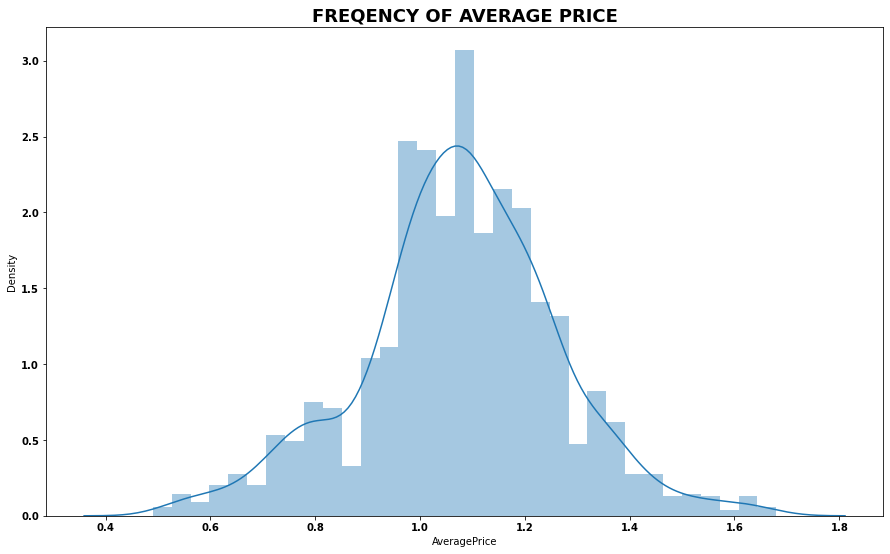

In [158]:
plt.figure(figsize=(15,9))
sns.distplot(df["AveragePrice"])
plt.title("FREQENCY OF AVERAGE PRICE",fontsize=18,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

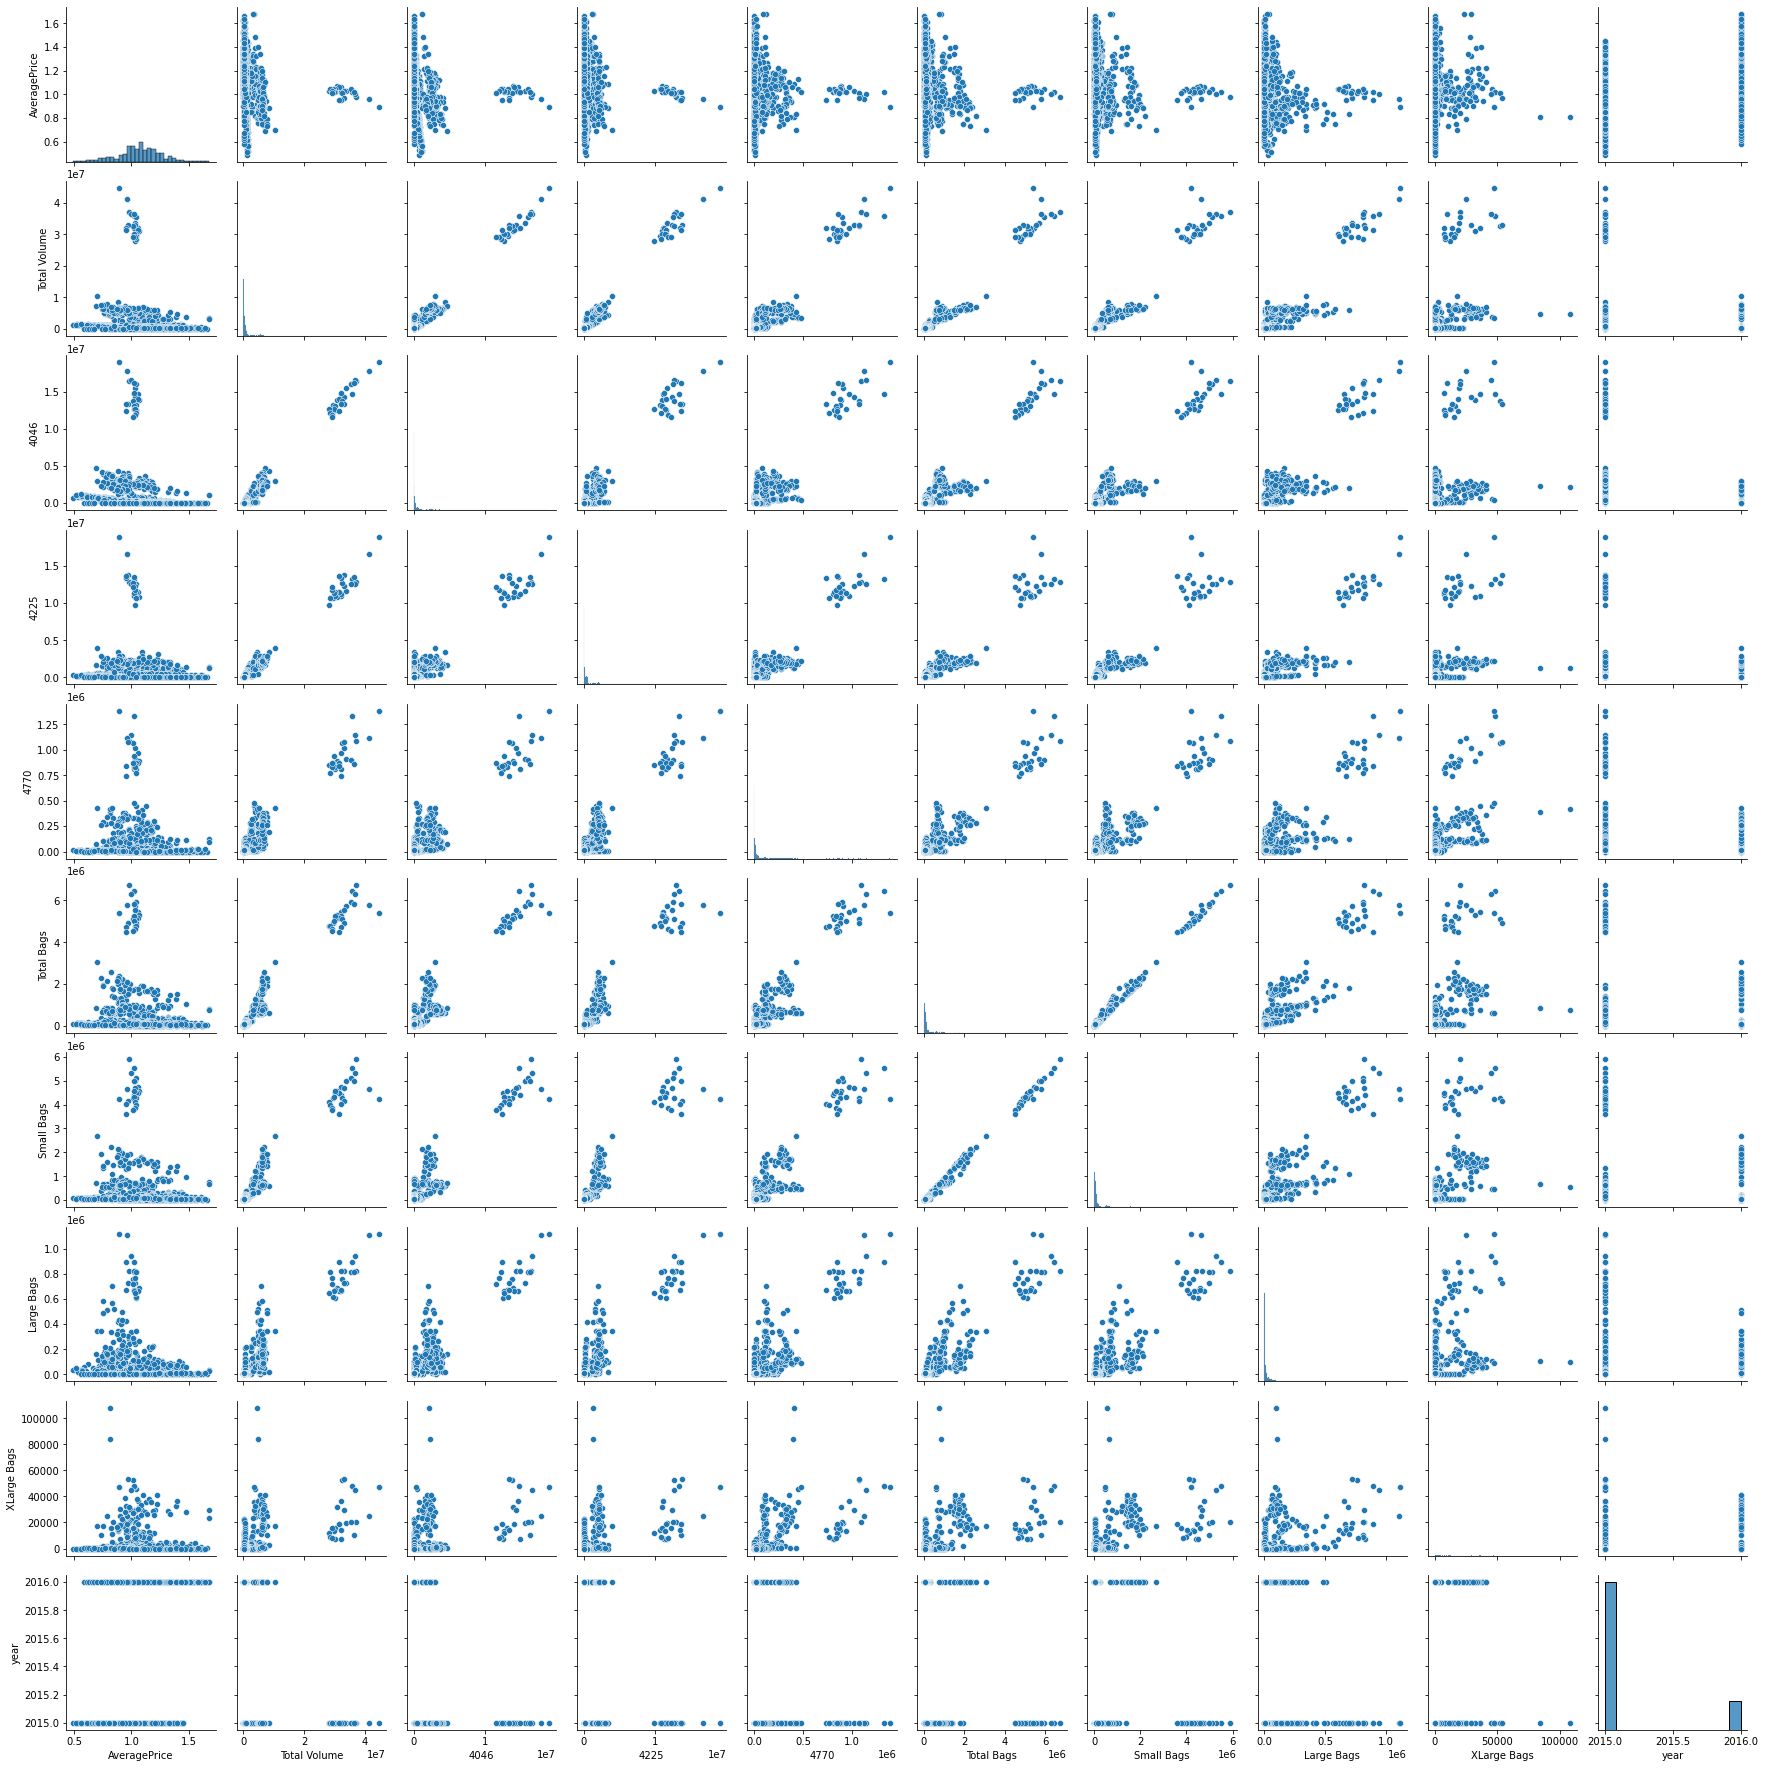

In [159]:
sns.pairplot(df)

# LET UNDERSTAND CORELATION 

In [160]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


# UNDERSTAND ON HEATMAP

<AxesSubplot:>

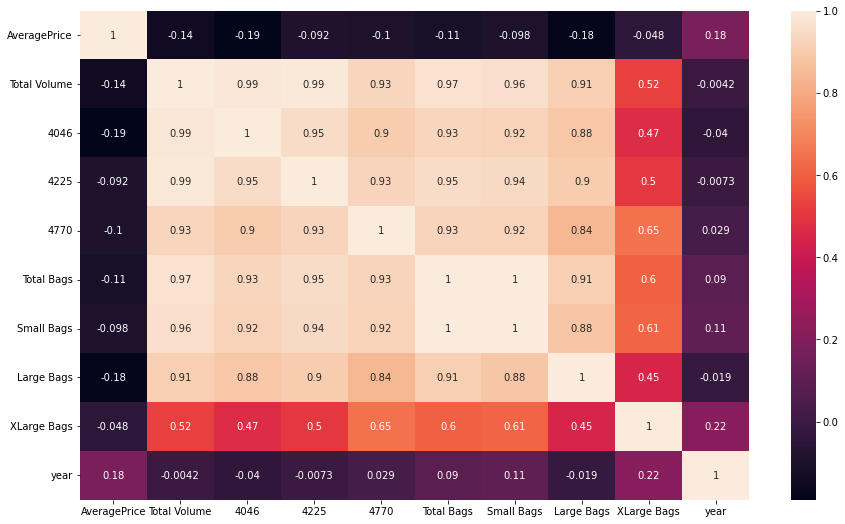

In [161]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

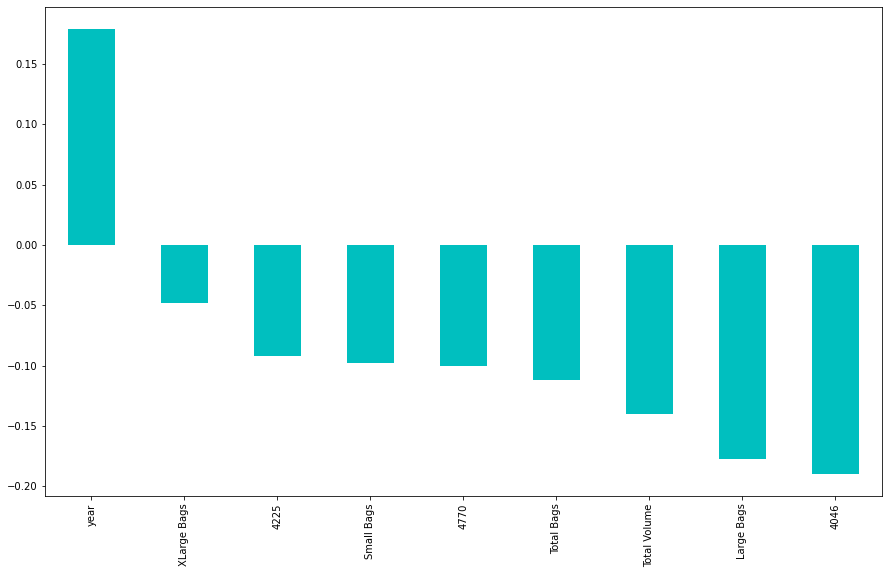

In [162]:
plt.figure(figsize=(15,9))
df.corr()["AveragePrice"].drop(["AveragePrice"]).sort_values(ascending=False).plot(kind="bar",color="c")

AS WE SEEN MOST OF THE FEATURES ARE NEGATIVELY CORELATED
* 4046 IS HIGHLY CORELATED WITH -0.20
* YEAR IS HIGHLY COREALTED WITH 0.15

# DROPING UNNESSARY COLUMNS

AS WE HAVE TWO YEAR COLUMNS "Date","year"we have to remove one of each columns

In [163]:
df.drop("Date",axis=1,inplace=True)

In [164]:
df["type"].nunique()

1

AS WE SEEN TYPE COLUMN IS HAVE ONLY 1 VALUE THEN IT MIGHT BE NOT GAVE HIGH EFFECT ON MODEL SO WE HAVE TO REMOVE IS

In [165]:
df.drop("type",axis=1,inplace=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   int64  
 10  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 130.5+ KB


# ENCODING THE DATAFRAME

In [167]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [168]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   int64  
 10  region        1517 non-null   int32  
dtypes: float64(9), int32(1), int64(1)
memory usage: 124.6 KB


AS WE SEEN THEIR IS NO OBJECT VALUE IN DATASET

# REMOVE OUTLIER

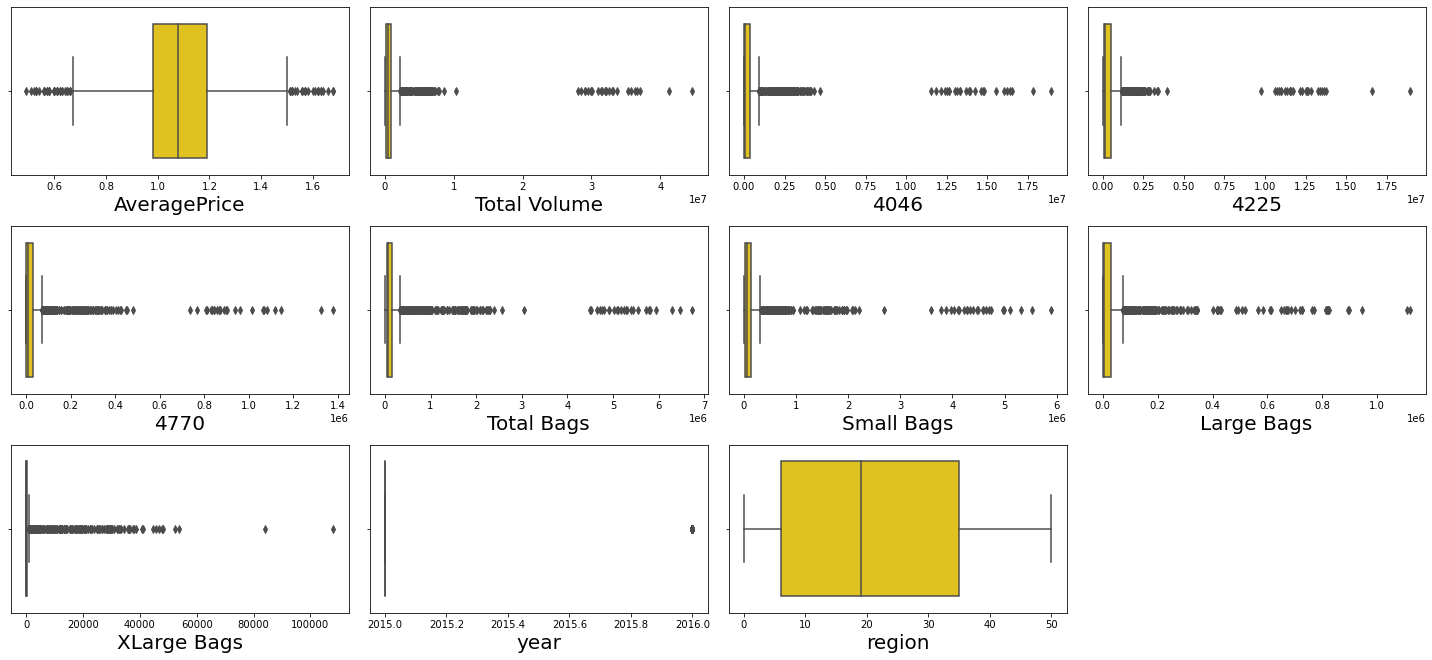

In [170]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[i],color='gold')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [171]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
        1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
        1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
        1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
        1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
        1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
        1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
        1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
        1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
        1200, 1200, 1200, 1200, 1200, 

In [172]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [173]:
df.shape

(1517, 11)

In [174]:
df_new.shape

(1436, 11)

In [175]:
data_loss=((1517-1436)/1517)*100

In [176]:
data_loss

5.339485827290705

THE DATA IS LOSS BELOW 10% 

# CHECK SKEWNESS

In [177]:
df=df_new

In [178]:
df.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
region             AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

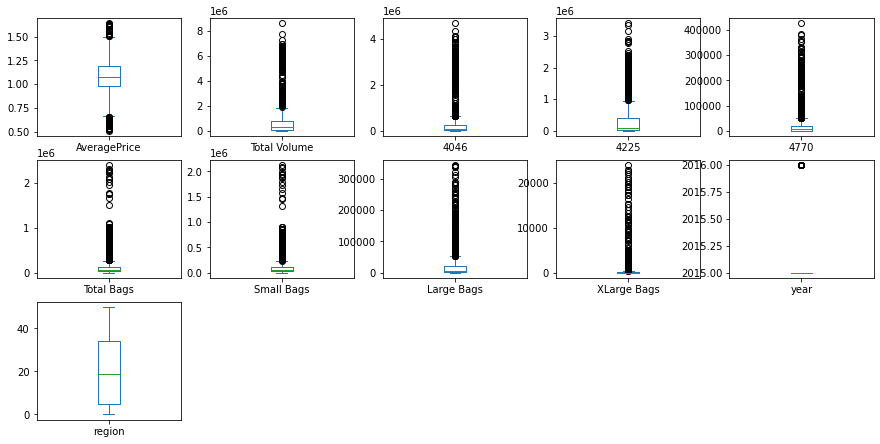

In [179]:
df.plot(kind='box',subplots= True,layout=(4,5),figsize=(15,10))

# SAPERATING COLUMNS INTO FEATURES AND TARGETS

# 1.) BY Average Price

In [180]:
x=df.drop("AveragePrice",axis=1)

In [181]:
y=df["AveragePrice"]

# SCALING BY MIN MAX SCALING

In [182]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [183]:
x=mms.fit_transform(x)

In [184]:
x

array([[2.98821974e-03, 1.21885054e-04, 1.54852939e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.89080184e-03, 4.42455041e-05, 1.25993788e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.31779751e-03, 7.00396733e-05, 3.15655673e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.63751461e-02, 9.83122206e-03, 1.50262219e-02, ...,
        3.44804383e-02, 1.00000000e+00, 1.40000000e-01],
       [1.76321483e-02, 1.14904370e-02, 1.52320806e-02, ...,
        0.00000000e+00, 1.00000000e+00, 1.40000000e-01],
       [1.69106832e-02, 9.13542209e-03, 1.54084335e-02, ...,
        0.00000000e+00, 1.00000000e+00, 1.40000000e-01]])

In [185]:
xf=pd.DataFrame(data=x)
xf

,0,1,2,3,4,5,6,7,8,9
0,0.002988,0.000122,0.015485,0.000113,0.002255,0.002497,0.000272,0.000000,0.0,0.00
1,0.001891,0.000044,0.012599,0.000137,0.002593,0.002876,0.000284,0.000000,0.0,0.00
2,0.009318,0.000070,0.031566,0.000306,0.002024,0.002232,0.000300,0.000000,0.0,0.00
3,0.004718,0.000142,0.020637,0.000170,0.001046,0.001116,0.000390,0.000000,0.0,0.00
4,0.001441,0.000101,0.012364,0.000178,0.001202,0.001262,0.000576,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
1431,0.017833,0.012223,0.016047,0.041096,0.023490,0.021474,0.030154,0.010042,1.0,0.14
1432,0.016355,0.009180,0.014819,0.045522,0.025115,0.024249,0.025034,0.000000,1.0,0.14
1433,0.016375,0.009831,0.015026,0.039233,0.024745,0.023602,0.024049,0.034480,1.0,0.14
1434,0.017632,0.011490,0.015232,0.041011,0.025379,0.024697,0.024107,0.000000,1.0,0.14


# MACHINE LEARNING MODEL

# RANDOM STATE

IMPORTANT LIBRARY

In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [187]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state{i}, The training accuracy is : {r2_score(y_train,pred_train)}')
    print(f'At random state{i}, The test accuracy is : {r2_score(y_test,pred_test)}')
    print('\n')

At random state0, The training accuracy is : 0.21523421586081748
At random state0, The test accuracy is : 0.20905072594809337


At random state1, The training accuracy is : 0.22463440741939067
At random state1, The test accuracy is : 0.20079028390617437


At random state2, The training accuracy is : 0.21447797372210076
At random state2, The test accuracy is : 0.22204401681145292


At random state3, The training accuracy is : 0.22141098670804704
At random state3, The test accuracy is : 0.2070182429682731


At random state4, The training accuracy is : 0.2202062924739986
At random state4, The test accuracy is : 0.2031607892079903


At random state5, The training accuracy is : 0.19824333716280762
At random state5, The test accuracy is : 0.2378983982600047


At random state6, The training accuracy is : 0.23221609283235067
At random state6, The test accuracy is : 0.18609936391836024


At random state7, The training accuracy is : 0.22078753578427868
At random state7, The test accuracy is : 0.

At random state70, The training accuracy is : 0.22648981476025576
At random state70, The test accuracy is : 0.1962610662012214


At random state71, The training accuracy is : 0.20680316245289787
At random state71, The test accuracy is : 0.23179918172477743


At random state72, The training accuracy is : 0.22814678385292242
At random state72, The test accuracy is : 0.19526463715377995


At random state73, The training accuracy is : 0.2012892687869855
At random state73, The test accuracy is : 0.24319549616732095


At random state74, The training accuracy is : 0.2107221693850243
At random state74, The test accuracy is : 0.232610649873489


At random state75, The training accuracy is : 0.20024790159533423
At random state75, The test accuracy is : 0.22615310266993538


At random state76, The training accuracy is : 0.21412841872856558
At random state76, The test accuracy is : 0.21760018841515372


At random state77, The training accuracy is : 0.22773844464123993
At random state77, The test a

AS WE CONCLUDE THAT 10th STATE GAVE HIGHEST VALUE, SO TAKE 10th AS RANDOM STATE

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [189]:
x_train.shape

(962, 10)

In [190]:
y_train.shape

(962,)

In [191]:
x_test.shape

(474, 10)

In [192]:
y_test.shape

(474,)

# MODEL BUILDING

1.) Linear Regression

In [193]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [194]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.13209706640444727
Mean squared error : 0.028151473109426412
Root Mean squared error : 0.16778400731126436
 R2 Score :
20.634581350333725


2.) Random Forest regressor

In [195]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [196]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.060304219409282704
Mean squared error : 0.006873086455696206
Root Mean squared error : 0.08290407984952372
 R2 Score :
80.62320284798786


3.) Decision Tree Regressor

In [197]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [198]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.07527426160337554
Mean squared error : 0.013367088607594937
Root Mean squared error : 0.11561612607069542
 R2 Score :
62.31513074483751


4.)Extra Tree Regressor

In [199]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred=etr.predict(x_test)

In [200]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.050166666666666686
Mean squared error : 0.0047173525738396695
Root Mean squared error : 0.06868298605797268
 R2 Score :
86.70070797057147


5.) XGB Regressor

In [201]:
xg=XGBRegressor()
xg.fit(x_train,y_train)
pred=xg.predict(x_test)

In [202]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.06139843507658078
Mean squared error : 0.007106886753105643
Root Mean squared error : 0.08430235318842318
 R2 Score :
79.96406652456388


AS WE SEEN BEST ACCURACY IS GOT BY EXTRA TREE REGRESSOR MODEL :85%, SO WE WILL SELECT THAT MODEL

# CROSS VALIDATION TABEL

In [203]:
from sklearn.model_selection import cross_val_score

In [204]:
score=cross_val_score(lr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',lr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : -0.41607023697355583
Difference in R2 & CV Score: 121.57109022191946


In [205]:
score=cross_val_score(rfr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',rfr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.16565867164954381
Difference in R2 & CV Score: 63.39819935960949


In [206]:
score=cross_val_score(dtr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',dtr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.7637437189882453
Difference in R2 & CV Score: 156.33843842338842


In [207]:
score=cross_val_score(etr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',etr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.2653547064075555
Difference in R2 & CV Score: 53.42859588380833


extra tree regressor  is best model whith high accuracy

# HYPER PERAMETER TUNNING

In [208]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
GCV=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

best_model=GCV.best_estimator_
best_params= GCV.best_params_

pred= best_model.predict(x_test)

In [209]:
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [210]:
final_mod=ExtraTreesRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2,n_estimators=300)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 87.10877092850968
mean_squared_error: 0.004572609767932494
mean_absolute_error: 0.04970738396624469
RMSE value: 0.06762107488004382


AFTER TUNNING I GOT 87% WHICH IS GOOD

# SAVING THE MODEL 

In [237]:
import joblib
joblib.dump(final_mod,"AvocadoCaseStudy_average.pkl")

['AvocadoCaseStudy_average.pkl']

In [238]:
model=joblib.load("AvocadoCaseStudy_average.pkl")

#prediction
prediction=model.predict(x_test)
prediction

array([1.1033    , 1.0243    , 1.00746667, 0.73636667, 0.9129    ,
       1.16696667, 1.0377    , 1.1502    , 1.1754    , 1.04096667,
       0.75246667, 1.21123333, 1.18523333, 0.7692    , 1.16863333,
       1.1598    , 1.1372    , 1.0402    , 0.6959    , 1.06973333,
       1.3636    , 1.12073333, 1.15976667, 1.38203333, 0.84843333,
       1.052     , 1.2171    , 1.18543333, 1.18576667, 1.01936667,
       1.04263333, 1.2556    , 1.00043333, 1.15243333, 1.20213333,
       1.14963333, 0.78593333, 1.03216667, 0.99243333, 1.1393    ,
       1.07156667, 1.40363333, 1.3605    , 1.1384    , 1.03133333,
       1.12283333, 1.21073333, 1.37596667, 1.3384    , 1.10873333,
       1.1922    , 1.22316667, 0.8928    , 1.10786667, 0.7848    ,
       1.09243333, 1.18233333, 1.20006667, 1.1845    , 1.20103333,
       0.9641    , 1.09526667, 1.08253333, 0.73733333, 1.3792    ,
       0.90186667, 1.37273333, 1.32416667, 1.0261    , 1.04356667,
       0.92736667, 0.54196667, 1.2241    , 1.1902    , 1.21466

In [213]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,464,465,466,467,468,469,470,471,472,473
Predicted,1.1033,1.0243,1.007467,0.736367,0.9129,1.166967,1.0377,1.1502,1.1754,1.040967,...,1.304733,1.1456,1.339867,1.069667,0.8697,1.1217,1.345633,0.873533,1.034367,0.6124
Original,1.0800,0.9500,0.970000,0.670000,0.8100,1.150000,0.9800,1.1100,1.2200,1.050000,...,1.290000,1.2100,1.230000,1.050000,0.7300,0.9700,1.400000,0.890000,1.040000,0.6000


# 2.) PREDICTION BY REGION

In [214]:
df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50])

# import libraries

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# SEPRATING TARGET AND TRANING DATA

In [216]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df.drop('region', axis=1) # Features (all columns except for the target)
y = df['region'] # Target (the region column)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [217]:
X_train.shape

(1005, 10)

In [218]:
y_train.shape

(1005,)

In [219]:
X_test.shape

(431, 10)

In [220]:
y_test.shape

(431,)

# 2.1.) with MultinomialNB 

In [221]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
predmnb=mnb.predict(X_test)
predmnb

array([41, 19, 41, 10, 40, 11, 19,  2,  0, 41, 42, 32, 15, 10,  2,  8, 44,
       23, 31, 33, 30,  5,  5,  0, 42,  4, 13, 47,  2, 16, 12,  5,  9, 18,
       13, 26, 10, 29, 29,  5, 33, 46, 30, 30, 12, 13, 23, 13,  5, 42, 27,
       32,  3, 23, 17, 44,  2,  2, 26, 16, 11, 24, 44, 50, 46, 24, 46,  4,
        3, 25, 23, 31,  2, 32,  2,  0,  9,  0, 22, 27,  0,  2, 44,  8, 19,
       23, 20, 10,  2, 20, 22, 33, 31, 34,  1, 36, 15, 50, 21,  3, 18,  8,
       42, 38, 23,  4, 17, 12, 33, 33, 50,  3,  2, 32, 38, 37,  2, 25, 19,
       16, 17, 10, 41, 16, 41, 36, 20,  0, 27, 13,  7,  5, 43, 28,  9, 42,
       32, 20,  5, 45, 11, 11, 10, 23, 47, 32,  3, 16,  7, 29,  2,  2, 32,
       13, 42, 36, 40, 12,  7, 31,  1, 24, 44,  5, 38, 22, 35,  0,  0,  8,
       44, 30,  9,  0, 39, 17, 16, 33,  5, 49,  2,  8,  1,  7, 22,  2, 26,
       16, 36, 38,  7,  0,  3, 17, 38,  9, 28, 26, 19,  2, 46, 23, 25,  2,
        5,  7, 35, 23, 22,  0, 37, 41, 16, 11, 17, 12, 50,  5,  3,  9, 30,
       11, 16, 40, 50, 15

In [222]:
print(accuracy_score(y_test,predmnb)*100)
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

70.76566125290023
[[18  0  0 ...  0  0  0]
 [ 0  7  0 ...  2  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       1.00      0.41      0.58        17
           2       1.00      1.00      1.00        23
           3       0.85      0.63      0.72        27
           4       0.62      0.44      0.52        18
           5       1.00      0.83      0.91        18
           6       0.00      0.00      0.00         7
           7       0.69      0.82      0.75        11
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       0.27      0.67      0.38         6
          11       0.78      1.00      0.88         7
          12       1.00      0.79      0.88        14
          13       0.40      0.67      0.50         6
          14   

# 2.2.) Decision tree Classifier

In [223]:
from sklearn.tree import DecisionTreeClassifier

In [224]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
preddtc

array([41, 19, 25, 31, 40, 11, 19,  2,  0, 41, 42, 32, 15, 10,  2,  8, 44,
        1, 31, 33, 30,  5,  5,  0, 42,  4, 13, 47,  2,  0, 12,  5,  9, 18,
       13, 26, 17, 19, 19,  5, 43, 46,  0, 18, 12, 13, 23, 30,  5,  6,  4,
       32,  3,  1, 17, 44,  2,  2, 26, 16, 49, 24, 44, 50, 46,  6, 46,  0,
       12,  3, 23, 31,  8, 32,  2,  0,  9,  0, 22, 26,  0,  2, 44,  8, 19,
        1, 20, 38,  2, 38, 22, 33, 31, 34,  1, 34, 15,  3, 42,  3, 18,  8,
       49,  6, 23,  4, 10, 12, 33, 33,  3,  3,  2, 18, 38, 37,  2, 25, 19,
       26, 42, 17, 41,  0, 41, 36, 20,  0, 27,  4,  7,  5, 43, 28,  9, 42,
       32, 31,  5, 37, 11, 11, 42,  1, 19, 32,  3, 16,  7, 29,  2,  2, 32,
        5,  6, 31, 40, 12,  3, 10,  1, 24, 31,  5, 38, 22,  7,  0, 32,  8,
       44, 30,  9,  0, 44, 17, 16, 33,  5, 42,  2,  8,  1, 35, 22,  2, 26,
       26, 36, 38,  7,  0,  3, 17, 38,  9,  4, 26, 19,  2, 44,  1, 25,  2,
        5, 35,  7, 47, 22,  0, 37, 41, 28, 11, 42, 12, 50,  5,  3,  9, 27,
       11, 28, 40,  3, 15

In [258]:
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

90.71925754060325
[[23  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.89      1.00      0.94        17
           2       0.95      0.91      0.93        23
           3       1.00      0.93      0.96        27
           4       1.00      0.89      0.94        18
           5       1.00      1.00      1.00        18
           6       0.88      1.00      0.93         7
           7       0.75      0.82      0.78        11
           8       0.78      0.88      0.82         8
           9       1.00      1.00      1.00         9
          10       0.80      0.67      0.73         6
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00         6
          14   

# 2.3.)  KNeighborsClassifier

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [227]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
predknn

array([41, 29, 19, 10, 34, 11, 19,  2,  0, 41, 42, 32, 15, 10,  2,  8, 44,
        1, 31, 33, 30,  5,  5,  0, 42,  4,  5, 47,  2,  0, 12,  5,  9, 18,
       13, 26, 17, 19, 19,  5, 33, 46,  0, 18, 12, 13, 29,  2,  5,  6,  4,
       22,  3,  1, 17, 44,  2,  2, 26, 16, 49, 24, 44, 50, 46,  6, 46,  0,
       12,  3, 50, 31,  2, 22,  2,  0,  9,  0, 22,  4,  0,  2, 44,  8, 19,
        1, 20, 38,  2, 38, 22, 33, 31, 34, 23, 38, 15,  3, 42,  3,  0,  8,
        6, 42,  1,  4, 17, 12, 33, 33,  3,  3,  2, 18, 38, 37,  2, 25, 19,
       26,  6, 31, 47,  0, 41, 36, 20,  0, 27, 28,  7,  5, 43, 28,  9, 42,
       22, 17,  5, 45, 11, 11, 42,  1, 19, 32,  3, 16,  7, 29,  2,  2, 22,
        5,  6, 34, 34, 12,  3, 31, 29, 14, 38,  5, 38, 22,  7,  0,  0,  8,
       44, 30,  9,  0, 44, 17, 28, 33, 13, 42, 26,  8,  1,  7, 22,  2, 26,
       26, 36, 38,  7,  0,  3, 17, 38,  9, 28, 26, 19,  2,  5,  1, 25,  2,
       13, 35, 35, 23, 22,  0, 37, 41, 28, 11,  6, 12, 50,  5,  3,  9, 27,
       11, 28, 40,  3, 15

In [259]:
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

83.75870069605568
[[24  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  1  0 ...  8  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.70      0.82      0.76        17
           2       0.91      0.91      0.91        23
           3       1.00      1.00      1.00        27
           4       0.73      0.61      0.67        18
           5       0.88      0.78      0.82        18
           6       0.50      0.86      0.63         7
           7       1.00      1.00      1.00        11
           8       1.00      0.88      0.93         8
           9       0.90      1.00      0.95         9
          10       0.75      0.50      0.60         6
          11       1.00      1.00      1.00         7
          12       1.00      0.86      0.92        14
          13       0.60      0.50      0.55         6
          14   

# 2.4.)SVC

In [229]:
from sklearn.svm import SVC

In [230]:
sv=SVC()
sv.fit(X_train,y_train)
predsv=sv.predict(X_test)
predsv

array([ 1,  0,  0, 31,  2,  4,  0,  2,  0,  1,  6,  0,  0, 31,  2,  2,  0,
        1, 31, 31,  4,  0,  0,  0, 42,  4,  0,  0,  2,  0,  9,  0,  0,  0,
        0, 26, 31,  0,  0,  0, 31,  0,  0,  0,  1,  0,  1,  4,  0, 42,  4,
        0,  0,  1, 31,  0,  2,  2, 26,  0, 49, 24,  0, 31,  0,  6,  0,  0,
        0,  0,  1, 31,  4,  0,  2,  0,  0,  0,  0,  4,  0,  2,  0,  2,  0,
        1,  0,  1,  2,  1,  0, 31, 31,  4,  1,  1,  0,  0, 42,  0,  0,  2,
        6, 42,  1,  4, 31,  1, 31, 31,  0,  0,  2,  0,  1,  0,  2,  0,  0,
       26, 42, 31,  1,  0,  9,  0,  0,  0, 27,  4,  0,  0, 43,  4,  0, 42,
        0, 31,  0,  0,  4,  4,  6,  1,  0,  0,  0,  0,  0,  0,  2,  2,  0,
        0,  6,  1,  1,  0,  0, 31,  1, 14,  1,  0,  1,  0,  0,  0,  0,  2,
        0,  4,  0,  0,  0, 31,  4, 31,  0, 42, 26,  2,  1,  0,  0,  2, 26,
       26,  0,  1,  0,  0,  0, 31,  1,  0,  4, 26,  0,  2,  0,  1,  0,  2,
        0,  0,  0,  1,  0,  0,  0,  9,  4,  2,  6,  0, 31,  0,  0,  0, 27,
        4,  4,  1,  0,  0

In [260]:
print(accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

29.930394431554525
[[25  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 5  5  0 ...  0  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.12      1.00      0.22        25
           1       0.26      1.00      0.41        17
           2       0.60      0.91      0.72        23
           3       0.00      0.00      0.00        27
           4       0.53      1.00      0.69        18
           5       0.00      0.00      0.00        18
           6       0.31      0.57      0.40         7
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        14
          13       0.00      0.00      0.00         6
          14  

# CROSS VALDIATION

In [232]:
from sklearn.model_selection import cross_val_score

Multinomial 

In [261]:
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.27777778 0.31010453 0.32404181 0.27526132 0.2195122 ]
0.2813395276809911
0.03611969014969352


SVC

In [262]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.58680556 0.62369338 0.65505226 0.61672474 0.53658537]
0.6037722609368952
0.039990509912874686


KNN

In [263]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.95138889 0.99303136 0.97909408 0.98954704 0.90940767]
0.9644938056523422
0.031181552254568614


DECISION TREE CLASSIFIER

In [264]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.93402778 0.96864111 0.95470383 0.94773519 0.93031359]
0.9470843012001549
0.013963572153968823


 as we seen DTC GAVES HISEGST SCORE

# SAVING THE BEST MODEL

In [273]:
import joblib

# Save model to file
joblib.dump(dtc, 'avocado_casestudy_region.pkl')


['avocado_casestudy_region.pkl']

# LOAD THE MODEL

In [274]:
modelr=joblib.load("avocado_casestudy_region.pkl")

In [275]:
predict=modelr.predict(X_test)
predict

array([41, 19, 25, 31, 40, 11, 19,  2,  0, 41, 42, 32, 15, 10,  2,  8, 44,
        1, 31, 33, 30,  5,  5,  0, 42,  4, 13, 47,  2,  0, 12,  5,  9, 18,
       13, 26, 17, 19, 19,  5, 43, 46,  0, 18, 12, 13, 23, 30,  5,  6,  4,
       32,  3,  1, 17, 44,  2,  2, 26, 16, 49, 24, 44, 50, 46,  6, 46,  0,
       12,  3, 23, 31,  8, 32,  2,  0,  9,  0, 22, 26,  0,  2, 44,  8, 19,
        1, 20, 38,  2, 38, 22, 33, 31, 34,  1, 34, 15,  3, 42,  3, 18,  8,
       49,  6, 23,  4, 10, 12, 33, 33,  3,  3,  2, 18, 38, 37,  2, 25, 19,
       26, 42, 17, 41,  0, 41, 36, 20,  0, 27,  4,  7,  5, 43, 28,  9, 42,
       32, 31,  5, 37, 11, 11, 42,  1, 19, 32,  3, 16,  7, 29,  2,  2, 32,
        5,  6, 31, 40, 12,  3, 10,  1, 24, 31,  5, 38, 22,  7,  0, 32,  8,
       44, 30,  9,  0, 44, 17, 16, 33,  5, 42,  2,  8,  1, 35, 22,  2, 26,
       26, 36, 38,  7,  0,  3, 17, 38,  9,  4, 26, 19,  2, 44,  1, 25,  2,
        5, 35,  7, 47, 22,  0, 37, 41, 28, 11, 42, 12, 50,  5,  3,  9, 27,
       11, 28, 40,  3, 15

In [276]:
dp=pd.DataFrame([modelr.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

In [277]:
dpt=dp.transpose()

In [278]:
dpt["Predicted"].sum()

8806

In [279]:
dpt["Original"].sum()

8666

In [281]:
prediction_percentage=(100-((8666-8462)/8666)*100)
prediction_percentage

97.64597276713593

# END PROJECT